# CSE 252A Computer Vision I Fall 2021 - Assignment 3

## Instructor: Ben Ochoa

- Assignment Published On: **Wed, November 3, 2021**.

- Due On: **Wed, November 17, 2021 11:59 PM (Pacific Time)**.

## Instructions
* This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu/courses/21788).
* All solutions must be written in this notebook.
  * **If** it includes the theoretical problems, you **must** write your answers in Markdown cells (using LaTeX when appropriate).
  * Programming aspects of the assignment must be completed using Python in this notebook.
* You may use Python packages (such as `NumPy` and `SciPy`) for basic linear algebra, but you may not use packages that directly solve the problem.
  * If you are unsure about using a specific package or function, then ask the instructor and/or teaching assistants for clarification.
* You must submit this notebook exported as a PDF that contains separate pages. You must also submit this notebook as `.ipynb` file.
  * Submit both files (`.pdf` and `.ipynb`) on Gradescope.
  * **You must mark the PDF pages associated with each question in Gradescope. If you fail to do so, we may dock points.**
* It is highly recommended that you begin working on this assignment early.
* **Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

## Problem 1: Multiscale image representations [15 pts]

In the [Lecture 9](https://cseweb.ucsd.edu/classes/fa21/cse252A-a/lec9.pdf), given an image, we compare its multiscale representation generated by **Gaussian Image Pyramid** and **Scale-space** methods. The task for this problem is to first build multiscale representations for image `p1/totoro.jpg`, then **comment on** your results obtained by generating a Gaussian pyramid for an image versus those obtained by generating its scale-space representation.

For the Gaussian pyramid, use a binomial kernel of size 5x5 as an approximation for the Gaussian filter. The sampling rate between levels is $rate=2$. 

For the scale-space representation, use a Gaussian filter where the standard deviation depends on the corresponding level of the pyramid (**Hint:** standard deviation $\sigma =  2^{level-1}$ for $level > 0$). 

Look at the lecture slides to see the correspondence between pyramid levels and standard deviation for the Gaussian filter in scale space. Also, remember the Gaussian filter dimension is $\lceil 6 \sigma \rceil$ for standard deviation $\sigma$. If the result is an even number, then add 1 to make it odd. 

You need to construct the pyramid and scale-space representation from level 0 to level 10. Note that level 0 is just the original image in both the representations.

Use the provided plotting function to visualize the results.

In [1]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import convolve
import scipy.special
import copy

def gaussian2d(filter_size, sig):
    """Creates a 2D Gaussian kernel with side length and a sigma."""
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def binomial_kernel(size):
    """Creates a binomial filter kernel"""
    coeffs = np.array([scipy.special.binom(size, i) for i in range(size+1)]).reshape((-1,1))
    kernel = np.repeat(coeffs, repeats=size+1, axis=1).T
    kernel = kernel * coeffs
    return kernel/np.sum(kernel)

def get_channel(img, channel):
    """ Function to extract 2D image corresponding to a channel index from a color image. 
    This function should return a H*W array which is the corresponding channel of the input image. """
    image = copy.deepcopy(img)     # Create a copy so as to not change the original image

    #### Write your code here. ####
    return image[:,:,channel]      # Extract the intended channel that is input by the user.
    
def merge_channels(img0, img1, img2):
    """ Function to merge three single channel images to form a color image. 
    This function should return a H*W*3 array which merges all three single channel images 
    (i.e. img0, img1, img2) in the input."""
    # Hint: There are multiple ways to implement it. 
    #       1. For example, create a H*W*C array with all values as zero and 
    #          fill each channel with given single channel image. 
    #          You may refer to the "Modify a subarray" section in the brief NumPy tutorial above.
    #       2. You may find np.stack() / np.concatenate() / np.reshape() useful in this problem.
    
    #### Write your code here. ####
    re_img0 = img0.reshape(img0.shape[0], img0.shape[1],1) # Reshape red channel from H x W  to H x W x 1
    re_img1 = img1.reshape(img1.shape[0], img1.shape[1],1) # Reshape green channel from H x W  to H x W x 1
    re_img2 = img2.reshape(img2.shape[0], img2.shape[1],1) # Reshape blue channel from H x W  to H x W x 1
    
    return np.concatenate((re_img0, re_img1, re_img2), axis=2) # merge them to H x W x 3

In [2]:
def gaussian_pyramid(img, num_levels = 10):
    """This function construct the gaussian pyramid for the input image.

    Args:
    img: original image(level-0)
    num_levels: number of levels to generate(level-0 not included)
    
    Returns:
    pyramid: the pyramid as a list consisting of all level images.
             The first element of the list is the original image itself.
    """
    
    pyramid = []
    pyramid.append(img.copy()) # level-0 image
    
    """ ==========
    YOUR CODE HERE
    ========== """
    # Copy image.
    conv_img = copy.deepcopy(img)
    
    # Red Channel Image
    conv_img_R = get_channel(conv_img, 0)
    # Green Channel Image
    conv_img_G = get_channel(conv_img, 1)
    # Blue Channel Image
    conv_img_B = get_channel(conv_img, 2)
    
    # Sampling rate, r_sampling = 2
    r_sampling = 2
    
    # Create a Gaussian pyramid
    for level_num in range(0, num_levels):
        
        # Get the Binomial Kernel
        Binomial_kernel = binomial_kernel(4)
        
        # Convolve image with the 5x5 Binomial Kernel to blur the image
        conv_img_R = convolve(conv_img_R, Binomial_kernel, mode='same')
        conv_img_G = convolve(conv_img_G, Binomial_kernel, mode='same')
        conv_img_B = convolve(conv_img_B, Binomial_kernel, mode='same')
        
        # Subsample the image
        conv_img_sub_R = conv_img_R[::r_sampling, ::r_sampling]
        conv_img_sub_G = conv_img_G[::r_sampling, ::r_sampling]
        conv_img_sub_B = conv_img_B[::r_sampling, ::r_sampling]
        
        # Merged R, G, B
        conv_img_sub = merge_channels(conv_img_sub_R, conv_img_sub_G, conv_img_sub_B)
        
        # Append to the pyramid list.
        pyramid.append(conv_img_sub/np.max(conv_img_sub))
        
        # Re-initialize the convoluted image
        conv_img_R = conv_img_sub_R
        conv_img_G = conv_img_sub_G
        conv_img_B = conv_img_sub_B
        
    return pyramid

In [3]:
def scale_space(img, num_levels = 10):
    """This function construct the scale-space representation for the input image.

    Args:
    img: original image(level-0)
    num_levels: number of levels to generate(level-0 not included)
    
    Returns:
    scale_space: the scale space as a list consisting of all the images in the scale space
             The first element of the list is the original image itself.
    """
    
    scale_space = []
    scale_space.append(img.copy()) # std = 0, level-0 image
    
    """ ==========
    YOUR CODE HERE
    ========== """
    # Copy image.
    conv_img = copy.deepcopy(img)
    
    # Red Channel Image
    conv_img_R = get_channel(conv_img, 0)
    # Green Channel Image
    conv_img_G = get_channel(conv_img, 1)
    # Blue Channel Image
    conv_img_B = get_channel(conv_img, 2)
    
    # Implement Scale Space
    for level_num in range(0, num_levels):
        
        # Standard deviation of the Gaussian Kernel
        sig = 2**level_num
        
        # Size of the Gaussian Kernel
        filter_size = 6 * sig
        
        # Check whether filter size is even
        if (filter_size % 2 == 0):
            
            # Add the filter size by 1
            filter_size = filter_size + 1
        
        # Get the Gaussian Kernel
        Gaussian_kernel = gaussian2d(filter_size, sig)
        
        # Convolve image with the 5x5 Gaussian Kernel 
        conv_img_R = convolve(conv_img_R, Gaussian_kernel, mode='same')
        conv_img_G = convolve(conv_img_G, Gaussian_kernel, mode='same')
        conv_img_B = convolve(conv_img_B, Gaussian_kernel, mode='same')
        
        # Merged R, G, B
        conv_img = merge_channels(conv_img_R, conv_img_G, conv_img_B)
        
        # Append to the scale space list.
        scale_space.append(conv_img/np.max(conv_img))

    return scale_space    

In [4]:
def plot_results(pyramid, scale_space):        
    
    print("\t\tGaussian Pyramid\t\t\t Scale Space Representation")
    
    N = len(pyramid)
    std_list = [0] + [2**i for i in range(N-1)]
    for i in range(N):
        pyramid_img = pyramid[i]
        scale_space_img = scale_space[i]
        
        # Check shape
        #print(pyramid_img.shape)
        #print(scale_space_img.shape)
        
        fig = plt.figure(figsize=(12, 9))
        
        ax1 = fig.add_subplot(221)
        ax1.imshow(pyramid_img)
        ax1.axis('off')
        plt.title("Level {}".format(i))
        
        ax2 = fig.add_subplot(222)
        ax2.imshow(scale_space_img)
        ax2.axis('off')
        plt.title("Standard Deviation = {}".format(std_list[i]))
        
        plt.show()

		Gaussian Pyramid			 Scale Space Representation


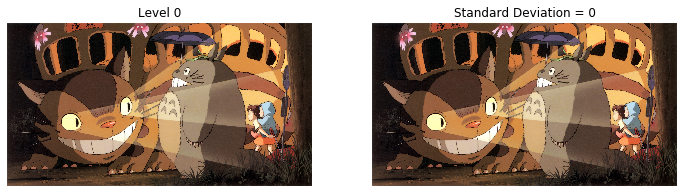

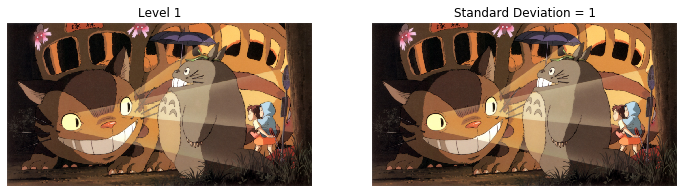

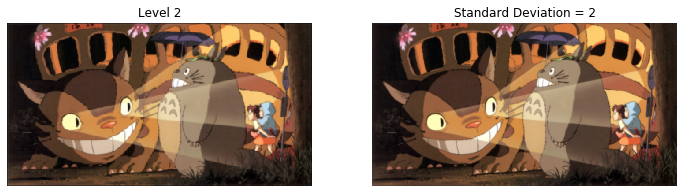

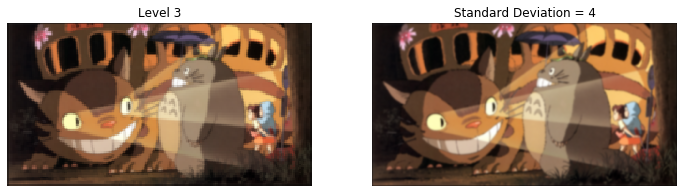

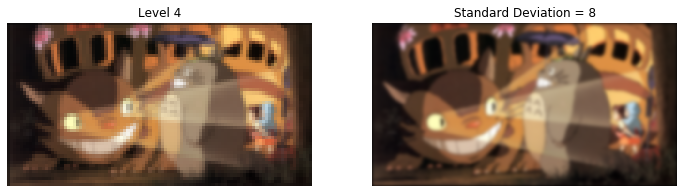

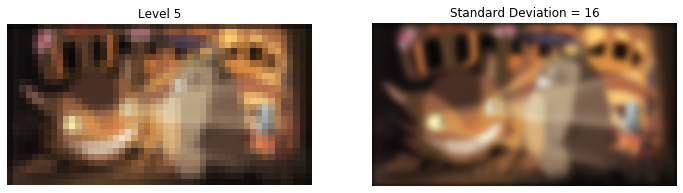

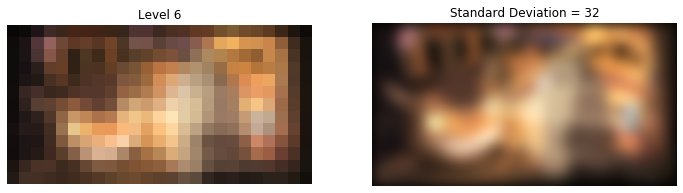

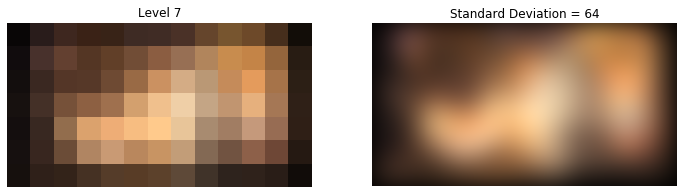

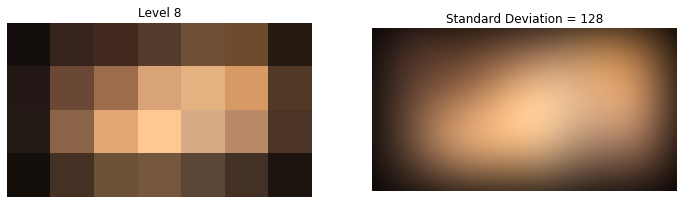

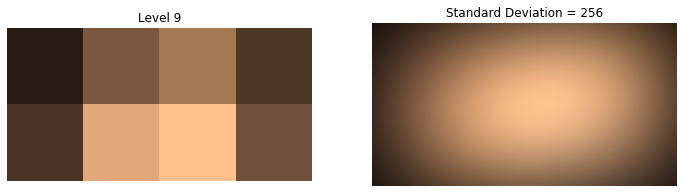

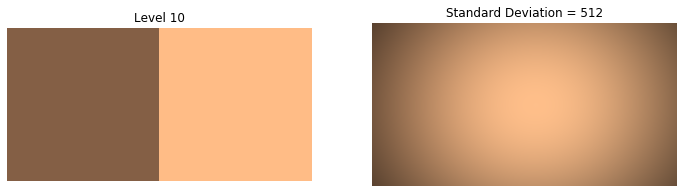

In [5]:
from imageio import imread

""" ==========
YOUR CODE HERE
========== """
img = imread("p1/totoro.jpg")

pyramid = gaussian_pyramid(img, num_levels = 10)

scale_space_rep = scale_space(img, num_levels = 10)

plot_results(pyramid, scale_space_rep)

**Comments on your results:**

----------->YOUR COMMENTS HERE<------------

The images' details from both Gaussian Pyramid and Scale Space representation decrease as the image was further blurred and downsampled with a sampling rate of 2 at a higher level and the standard deviation of the Gaussian Filter increases, respectively. However, the Gaussian Pyramid produces more blocky artifacts in the image as the Level increases, but the Scale Space produces smoother blurred images as the Gaussian Filter's standard deviation increases.

----------->COMMENTS END<------------

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## Problem 2: Epipolar Geometry | Uncalibrated Stereo [40 points]

In Assignment 2, we worked with calibrated cameras (i.e., calibration matrices $K_1$ and $K_2$, camera rotation matrices $R_1$ and $R_2$, camera translation vectors $t_1$ and $t_2$) to solve calibrated stereo. 

In this problem, we are interested in recovering the stereo information without the use of a calibration process. Specifically, given ground-truth correspondences from a pair of images, your task is to estimate the fundamental matrix and recover the epipolar geometry.

### Problem 2.1 Fundamental matrix [12 points]

Complete the `compute_fundamental` function below using the 8-point algorithm described in lecture. Note that the normalization of the corner points is handled in the `fundamental_matrix` function.

**Hint:** Feel free to use any basic Python packages to solve the singular value decomposition. However, read the corresponding documents to make sure about the form of parameters and returns.

In [6]:
def compute_fundamental(x1, x2):
    """    
    Computes the fundamental matrix from corresponding points using the 8 point algorithm.
    Args:
        x1: normalized homogeneous matching points from image1(3xN)
        x2: normalized homogeneous matching points from image2(3xN)
    Returns:
        F: Fundamental Matrix (3x3)
    """
    
    F = np.ones((3,3))
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Determine the size of x1 or x2 (Size of the x1 and x2 should be some N number)
    N = x1.shape[1]
    
    # Initialize A (should be N x 9)
    A = np.zeros((N, 9))
    
    # Compute A
    for row in range(0, N):
        
        # Determine a_i.T for every row
        # [x_i * x'_i, y_i * x'_i, w_i * x'_i,
        #  x_i * y'_i, y_i * y'_i, w_i * y'_i,
        #  x_i * w'_i, y_i * w'_i, w_i * w'_i]
        A[row] = [x1[0, row] * x2[0, row], x2[0, row] * x1[1, row], x2[0, row] * x1[2, row],
                  x2[1, row] * x1[0, row], x1[1, row] * x2[1, row], x2[1, row] * x1[2, row],
                  x2[2, row] * x1[0, row], x2[2, row] * x1[1, row], x1[2, row] * x2[2, row]]
        
    # Compute SVD
    U, Sig, V_transpose = np.linalg.svd(A)
    
    # Convert V^T to V
    V = V_transpose.T
    
    # Define and Initialize the 3 x 3 Fundamental Matrix
    F = V[ :, -1].reshape(3, 3)
    
    # Make F a rank 2 Matrix and determinant of F = 0
    U_F, Sig_F, V_transpose_F = np.linalg.svd(F)
    Sig_F[2] = 0 # Make the last diagonal of Sig_F to be zero.
    F = np.dot(np.dot(U_F, np.diag(Sig_F)), V_transpose_F)
    F = -F
    
    return F

def fundamental_matrix(x1,x2):
    """    
    Computes the fundamental matrix from corresponding points
    
    Args:
        x1: unnormalized homogeneous points from image1(3xN)
        x2: unnormalized homogeneous points from image2(3xN)
        
    Returns:
        Fundamental Matrix (3x3)
    """
        
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)

    # reverse normalization
    #F = np.dot(T1.T,np.dot(F,T2))
    F = np.dot(T2.T,np.dot(F,T1))

    return (F/np.linalg.norm(F))

In [7]:
# TEST CODE, DO NOT MODIFY
# Here is the code for you to test your implementation
cor1 = np.load("./p2/"+'dino'+"/cor1.npy")
cor2 = np.load("./p2/"+'dino'+"/cor2.npy")
print(fundamental_matrix(cor1, cor2))

 
#should print  
#[[ 4.00480819e-07 -2.69886048e-06  1.37812305e-03]  
# [ 3.09602270e-06 -1.00966950e-08 -7.29636272e-03]  
# [-2.86950511e-03  6.70416604e-03  9.99945841e-01]]  
# 

[[ 4.00480819e-07 -2.69886048e-06  1.37812305e-03]
 [ 3.09602270e-06 -1.00966950e-08 -7.29636272e-03]
 [-2.86950511e-03  6.70416604e-03  9.99945841e-01]]


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 2.2 Epipoles [6 points]

In this part, you are supposed to complete the function <code>compute_epipole</code> to calculate the epipoles for a given fundamental matrix.

In [8]:
def compute_epipole(F):
    """
    This function computes the epipoles for a given fundamental matrix.
    
    Args:
      F: fundamental matrix
      
    Returns:
      e1: corresponding epipole in image1
      e2: corresponding epipole in image2
    """
    e1 = np.array([0, 0, 0])
    e2 = np.array([0, 0, 0])
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Determine epipole e_1 and e_2 by computing SVD
    _, _, V_transpose_1 = np.linalg.svd(F)
    _, _, V_transpose_2 = np.linalg.svd(F.T)
    
    # Convert e1 and e2 to Cartesian Coodinates
    # Extract the last column of V
    e1 = V_transpose_1.T[:, -1] 
    e2 = V_transpose_2.T[:, -1]
    
    # Make w = 1, Affine homgeneous.
    e1 = e1 / e1[2]
    e2 = e2 / e2[2]
    
    return e1,e2

In [9]:
# TEST CODE, DO NOT MODIFY
# Here is the code for you to test your implementation
F_test = np.array([[1, 2, 1], [6, 5, 4], [9, 8, 1]])
print(compute_epipole(F_test))
 
#should print  
#(array([-41.86658577,  46.87378417,   1.        ]), array([-65.3659783 ,  15.85984739,   1.        ]))  
# 

(array([-41.86658577,  46.87378417,   1.        ]), array([-65.3659783 ,  15.85984739,   1.        ]))


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 2.3: Epipolar Lines [12 points]

For this part, given pairs of images, your task is to plot the epipolar lines in both images for each image pair. You will want to complete the function <code>plot_epipolar_lines</code> using the `fundamental_matrix` function you just got. 
 
The figure below gives you an idea on how the final results look on **dino**. Show your results for **matrix** and **warrior**.
![Dino Epipolar](fig/eg_dino_epipolar_lines.png) 

In [10]:
def plot_epipolar_lines(img1, img2, F, cor1, cor2):
    """Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        F:    Fundamental matrix
        cor1: Corners in homogeneous image coordinate in image 1 (3xN)
        cor2: Corners in homogeneous image coordinate in image 2 (3xN)
    """
    
    assert cor1.shape[0] == 3
    assert cor2.shape[0] == 3
    assert cor1.shape == cor2.shape
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Determine the number of corners
    num_cor1 = cor1.shape[1]
    num_cor2 = cor2.shape[1]
    
    # Define plot and set the size
    fig = plt.figure(figsize=(15, 15))
    # Define 1st subplot
    ax1 = fig.add_subplot(221)
    ax1.imshow(img1, cmap='gray')
    
    for iteration in range(0, num_cor2):
        
        # l = F.T * x'
        eipolar_line_img1 = np.dot(F.T, cor2[:, iteration])
        
        # Plot the line from end to end
        x_min = 0
        x_max = img1.shape[1]
        
        # General Line Equation, ax + by + c = 0 
        a, b, c = eipolar_line_img1[0], eipolar_line_img1[1], eipolar_line_img1[2]
        y_1 = -c / b
        y_2 = -c / b - (a * x_max) / b
        
        # Plot the epipolar line (Point infront of the line)
        ax1.plot([x_min, x_max],[y_1, y_2], color = 'b', zorder=1)
        # Set Axis Limit
        ax1.axis([0, img1.shape[1], img1.shape[0], 0])
    
    # Plot corners
    ax1.scatter(cor1[0][:], cor1[1][:], s=35, edgecolors='b', facecolors='r', zorder=2)
    
    # Define 2nd subplot
    ax2 = fig.add_subplot(222)
    ax2.imshow(img2, cmap='gray')
    
    for iteration in range(0, num_cor1):
        
        # l' = F * x
        eipolar_line_img2 = np.dot(F, cor1[:, iteration])
        
        # Plot the line from end to end
        x_min = 0
        x_max = img2.shape[1]
        
        # General Line Equation, ax + by + c = 0 (Point infront of the line)
        a, b, c = eipolar_line_img2[0], eipolar_line_img2[1], eipolar_line_img2[2]
        y_1 = -c / b
        y_2 = -c / b - (a * x_max) / b
        
        # Plot the epipolar line
        ax2.plot([x_min, x_max],[y_1, y_2], color = 'b', zorder=1)
        # Set Axis Limit
        ax2.axis([0, img2.shape[1], img2.shape[0], 0])
        
    # Plot corners
    ax2.scatter(cor2[0][:], cor2[1][:], s=35, edgecolors='b', facecolors='r', zorder=2)
    
    plt.show()


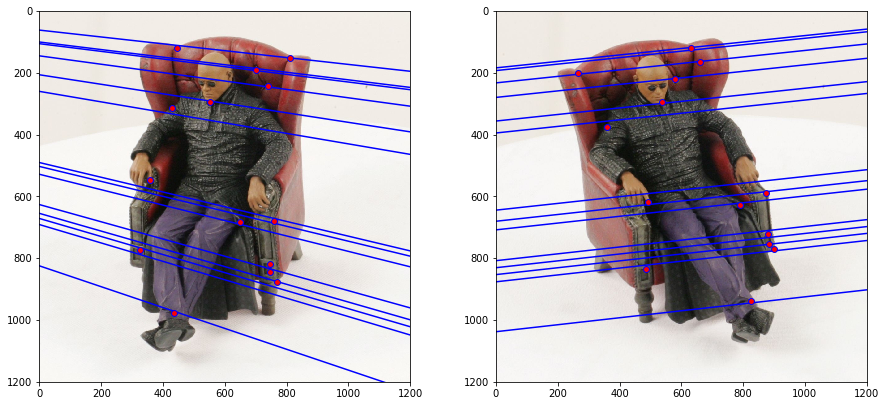

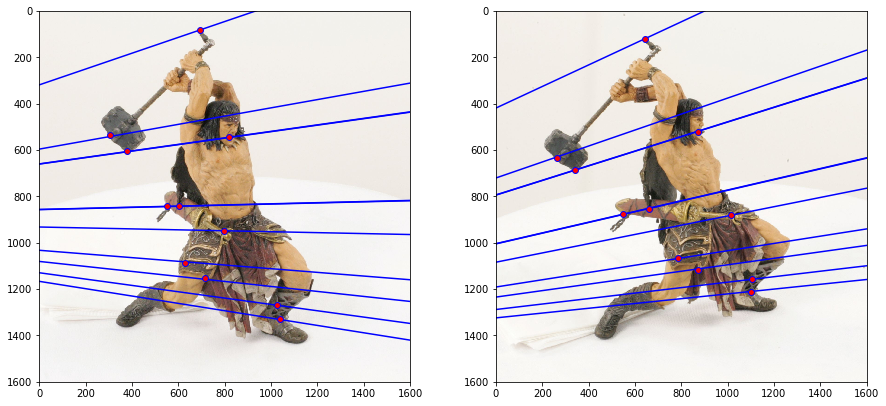

In [11]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results. 
# The total number of outputs is 4 images in 2 pairs

imgids = ["matrix", "warrior"]
for imgid in imgids:
    I1 = imread("./p2/"+imgid+"/"+imgid+"0.png")
    I2 = imread("./p2/"+imgid+"/"+imgid+"1.png")
    cor1 = np.load("./p2/"+imgid+"/cor1.npy")
    cor2 = np.load("./p2/"+imgid+"/cor2.npy")
    F = fundamental_matrix(cor1, cor2)
    plot_epipolar_lines(I1,I2,F,cor1,cor2)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 2.4: Uncalibrated Stereo Image Rectification [10 points]

In Assignment 2, you performed epipolar rectification with calibrated stereo cameras. Rectifying a pair of images can also be done for uncalibrated camera images. Using the fundamental matrix we can find the pair of epipolar lines $\boldsymbol{l_i}$ and $\boldsymbol{l^{'}_i}$ for each of the correspondences. The intersection of these lines will give us the respective epipoles $\boldsymbol{e}$ and $\boldsymbol{e^{'}}$. Now to make the epipolar lines to be parallel we need to map the epipoles to infinity. Hence, we need to find a homography that maps the epipoles to infinity.
 
The rectificaton method has already been implemented for you. You can get more details from the paper *Theory and Practice of Projective Rectification* by Richard Hartley.

Your task is to:

1) complete the `warp_image` function (**Hint:** You may reuse some of the codes from Homework2, but this time we perform the warp of the full image content. The size of the output image is bounded by the **bounding box**).

2) use the given `image_rectification` function to find the rectified images

3) plot the parallel epipolar lines using the `plot_epipolar_lines` function from above.

The figure below gives you an idea on how the final results look (Note that the two images may not be in the same shape). Show your result for **matrix** and **warrior**.
![House Rectification](fig/exp_house_rectify.png) 

In [12]:
# convert points from euclidean to homogeneous
def to_homog(points): #here always remember that points is a 3x4 matrix
    # write your code here
    
    # Determine Number of Columns (i.e., number of coordinates)
    num_Points = points.shape[1]
    
    # Generate an array with ones 
    array_of_ONES = np.ones(num_Points)
    
    # Stack the points matrix with the array with ones.
    homo_points = np.vstack([points, array_of_ONES])
    
    return homo_points

# convert points from homogeneous to euclidean
def from_homog(points_homog):
    # write your code here
    
    # Change the matrix data type to float
    points_homog = points_homog.astype(float)
    
    # Extract the last row of the array.
    array_of_Ws = points_homog[-1,:]
    
    # Determine the number of rows of the matrix.
    num_rows = points_homog.shape[0]
    
    # Delete the last row of the points_homog matrix.
    euclid_points = np.delete(points_homog, num_rows-1, axis=0)
    
    # Divide the coordinates with its own w.
    for col in range(len(array_of_Ws)):
        for row in range(euclid_points.shape[0]):
            euclid_points[row, col] = euclid_points[row, col] / array_of_Ws[col]
    
    return euclid_points

def warp_image(image, H):
    """
    Performs the warp of the full image content.
    Calculates bounding box by piping four corners through the transformation.
    Args: 
        image: Image to warp
        H: The image rectification transformation matrices.
    Returns:
        Out: An inverse warp of the image, given a homography.
        min_x, min_y: The minimum/maxmum of warped image bound.
    """
    #out_height, out_width = max_y - min_y, max_x - min_x

    """ ==========
    YOUR CODE HERE
    ========== """
    # Determine the Image Size
    Height, Width, Channel = image.shape
    
    # Prevent from clipping input data.
    img = image/np.max(image)
    #print(H)
    
    # Top Left Corner of the Source Image Homogeneous Coordinate
    c_s_top_left = np.array([[0],[0],[1]])
    # Top Right Corner of the Source Image Homogeneous Coordinate
    c_s_top_right = np.array([[Width - 1], [0],[1]])
    # Bottom Left Corner of the Source Image Homogeneous Coordinate
    c_s_bottom_left = np.array([[0],[Height - 1],[1]])
    # Bottom Right Corner of the Source Image Homogeneous Coordinate
    c_s_bottom_right = np.array([[Width - 1], [Height - 1],[1]])
    
    # Top Left Corner of the Target Image Homogeneous Coordinate
    c_t_top_left = np.dot(H, c_s_top_left)
    # Convert back to 2D
    c_t_top_left_2D = from_homog(c_t_top_left)
    #print(c_t_top_left_2D)
    
    # Top Right Corner of the Target Image Homogeneous Coordinate
    c_t_top_right = np.dot(H, c_s_top_right)
    # Convert back to 2D
    c_t_top_right_2D = from_homog(c_t_top_right)
    #print(c_t_top_right_2D)
    
    # Bottom Left Corner of the Target Image Homogeneous Coordinate
    c_t_bottom_left = np.dot(H, c_s_bottom_left)
    # Convert back to 2D
    c_t_bottom_left_2D = from_homog(c_t_bottom_left)
    #print(c_t_bottom_left_2D)
    
    # Bottom Right Corner of the Target Image Homogeneous Coordinate
    c_t_bottom_right = np.dot(H, c_s_bottom_right)
    # Convert back to 2D
    c_t_bottom_right_2D = from_homog(c_t_bottom_right)
    #print(c_t_bottom_right_2D)
    
    # Combine the c_ts (2 x 4)
    c_t_mat = np.concatenate((c_t_top_left_2D, c_t_top_right_2D, c_t_bottom_left_2D, c_t_bottom_right_2D), axis=1)
    #print(c_t_mat)
    
    # Find min of height and width
    min_y = int(floor(c_t_mat.min(axis=1)[1]))
    min_x = int(floor(c_t_mat.min(axis=1)[0]))
    
    # Find max of height and width
    max_y = int(ceil(c_t_mat.max(axis=1)[1]))
    max_x = int(floor(c_t_mat.max(axis=1)[0]))
    #print(min_x, min_y, max_x, max_y)
    
    # Size of the Bounding Box
    out_height, out_width = int(abs(max_y - min_y)+1), int(abs(max_x - min_x)+1)
    
    # Initialize output image (H x W x 3)
    out = np.zeros((out_height, out_width, int(Channel)))
    #out = np.zeros((Height, Width, Channel))
    #print(out_height, out_width)
    
    # Compute inverse of the rectification transformation matrix, H
    H_inv = np.linalg.inv(H)
    
    for h in range(0, out_height):
    #for h in range(0, Height):
        for w in range(0, out_width):
        #for w in range(0, Width):
            
            # Convert to A Homogeneous Coordinate
            p_t_homog = to_homog(np.array([[w+min_x], [h+min_y]]))
            
            # Get the estimated source pixel coordinate
            p_s_w, p_s_h = from_homog(np.dot(H_inv, p_t_homog))
            
            # If ps is within source image, copy I(ps) to T(pt)
            if (0 <= int(p_s_h) < Height) and (0 <= int(p_s_w)< Width):
                                                   
                out[h, w, :] = img[int(p_s_h), int(p_s_w), :]

    return out, min_x, min_y

In [13]:
from math import floor, ceil

def compute_matching_homographies(e2, F, im2, points1, points2):
    """This function computes the homographies to get the rectified images.
    
    Args: 
    e2: epipole in image 2
    F: the fundamental matrix (think about what you should be passing: F or F.T!)
    im2: image2
    points1: corner points in image1
    points2: corresponding corner points in image2
    
    Returns:
    H1: homography for image 1
    H2: homography for image 2
    """
    # calculate H2
    width = im2.shape[1]
    height = im2.shape[0]

    T = np.identity(3)
    T[0][2] = -1.0 * width / 2
    T[1][2] = -1.0 * height / 2

    e = T.dot(e2)
    e1_prime = e[0]
    e2_prime = e[1]
    if e1_prime >= 0:
        alpha = 1.0
    else:
        alpha = -1.0

    R = np.identity(3)
    R[0][0] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[0][1] = alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][0] = - alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][1] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)

    f = R.dot(e)[0]
    G = np.identity(3)
    G[2][0] = - 1.0 / f

    H2 = np.linalg.inv(T).dot(G.dot(R.dot(T)))

    # calculate H1
    e_prime = np.zeros((3, 3))
    e_prime[0][1] = -e2[2]
    e_prime[0][2] = e2[1]
    e_prime[1][0] = e2[2]
    e_prime[1][2] = -e2[0]
    e_prime[2][0] = -e2[1]
    e_prime[2][1] = e2[0]

    v = np.array([1, 1, 1])
    M = e_prime.dot(F) + np.outer(e2, v)

    points1_hat = H2.dot(M.dot(points1.T)).T
    points2_hat = H2.dot(points2.T).T

    W = points1_hat / points1_hat[:, 2].reshape(-1, 1)
    b = (points2_hat / points2_hat[:, 2].reshape(-1, 1))[:, 0]

    # least square problem
    a1, a2, a3 = np.linalg.lstsq(W, b, rcond=None)[0]
    HA = np.identity(3)
    HA[0] = np.array([a1, a2, a3])

    H1 = HA.dot(H2).dot(M)
    return H1, H2

In [14]:
def image_rectification(im1, im2, points1, points2):
    """This function provides the rectified images along with the new corner points as
    images with corner correspondences
    
    Args:
    im1: image1
    im2: image2
    points1: corner points in image1
    points2: corner points in image2
    
    Returns:
    rectified_im1: rectified image 1
    rectified_im2: rectified image 2
    new_cor1: new corners in the rectified image 1
    new_cor2: new corners in the rectified image 2
    """
    F = fundamental_matrix(points1, points2)
    e1, e2 = compute_epipole(F)
    #H1, H2 = compute_matching_homographies(e2, F.T, im2, points1.T, points2.T)
    H1, H2 = compute_matching_homographies(e2, F, im2, points1.T, points2.T)
    
    # Apply homographies
    rectified_im1, min_x1, min_y1 = warp_image(im1, H1)
    rectified_im2, min_x2, min_y2 = warp_image(im2, H2)

    new_cor1 = np.dot(H1, points1) # 3 x n
    new_cor1 /= new_cor1[-1, :]
    new_cor1[0, :] -= min_x1
    new_cor1[1, :] -= min_y1
    new_cor2 = np.dot(H2, points2)
    new_cor2 /= new_cor2[-1, :]
    new_cor2[0, :] -= min_x2
    new_cor2[1, :] -= min_y2
    return rectified_im1, rectified_im2, new_cor1, new_cor2

./p2/matrix/matrix0.png


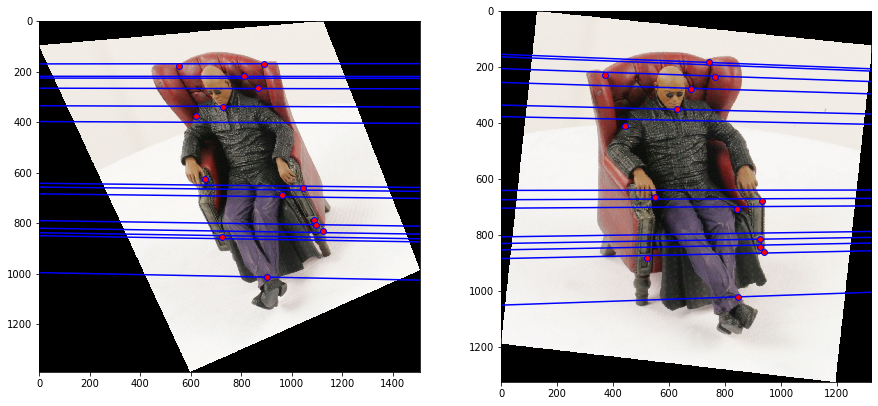

./p2/warrior/warrior0.png


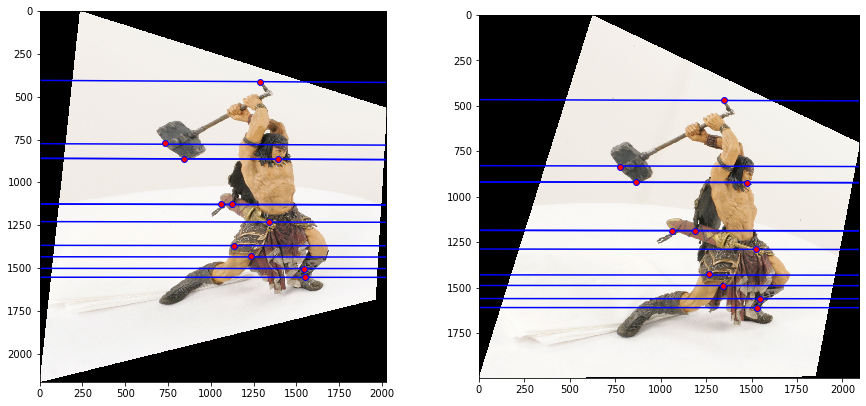

In [15]:
# This code is for you to plot the results. 
# The total number of outputs is 4 images in 2 pairs

imgids = ["matrix", "warrior"]
for imgid in imgids:
    print("./p2/"+imgid+"/"+imgid+"0.png")
    I1 = imread("./p2/"+imgid+"/"+imgid+"0.png")
    I2 = imread("./p2/"+imgid+"/"+imgid+"1.png")
    
    cor1 = np.load("./p2/"+imgid+"/cor1.npy")
    cor2 = np.load("./p2/"+imgid+"/cor2.npy")
    
    """ ==========
    YOUR CODE HERE
    ========== """
    # Rectify images
    rectified_im1, rectified_im2, new_cor1, new_cor2 = image_rectification(I1, I2, cor1, cor2)
    # Compute Fundamental Matrix
    F = fundamental_matrix(new_cor1, new_cor2)
    # Plot epipolar line
    plot_epipolar_lines(rectified_im1, rectified_im2, F, new_cor1, new_cor2)


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## Problem 3: Fundamental Matrix Estimation with RANSAC [40 pts]

In problem 2, you have `fundamental_matrix` function which calculates the fundamental matrix $F$ from matching pairs of points in two different images. In this problem, we will first implement a SIFT (Scale-Invariant Feature Transform)-pipeline that detects feature points and identifies matching points between two images. Then we estimate the fundamental matrix $F$ with those matching points using RANSAC method.

**Instruction:** You can use basic functions/objects in OpenCV, but you may not use functions that directly solve the problem unless specified.

### Problem 3.1: SIFT Feature Detection [5 pts]

Let's get some experience with SIFT detection. You may refer to [SIFT Python tutorial](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html) and OpenCV [cv::SIFT Class Reference](https://docs.opencv.org/4.5.1/d7/d60/classcv_1_1SIFT.html) according to your OpenCV version. For more details and understanding, reading [the original paper](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf) is highly recommended. 

The following example plots keypoints on `p2/dino/dino0.png`. Your task is to plot a similar image for `p2/dino/dino1.png`.
<center><img src="fig/eg_dino_sift.png" alt="DINO SIFT" width="400" align="center"/></center>

For this part ONLY(Problem 3.1), you will use any OpenCV functions you need.

In [38]:
import cv2
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

def get_sift_features_plot(image):
    """This function draws SIFT features
    
    Args:
    image:rgb image
    
    Returns:
    keypoint_image: image with key points drawn on
    """
    keypoint_image = image.copy()
        
    """ ==========
    YOUR CODE HERE
    ========== """
    # Implement SIFT algorithm to detect key points in the image
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints = sift.detect(keypoint_image, None)
    
    # Draw the keypoints on the input image
    keypoint_image = cv2.drawKeypoints(keypoint_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    return keypoint_image

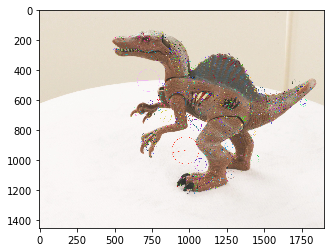

In [39]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results. 
image = imread('p2/dino/dino1.png')
keypointimage = get_sift_features_plot(image)
plt.imshow(keypointimage)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 3.2: SIFT Feature Matching [10 pts]

Let's try to match the SIFT features from a pair of images. You will be using [cv::BFMatcher](https://docs.opencv.org/4.5.3/d3/da1/classcv_1_1BFMatcher.html), a Brute-force descriptor matcher in OpenCV. Also, we will draw lines between the features that match in both the images like you did in Homework 2. However, you will use [OpenCV Drawing Functions](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html) this time.
Complete the `get_matches_sift` and `create_matching_image` functions to draw a pair of matched images. The following example plots the result for **dino**, your task is to plot the result for **skull-book**.
![DINO MATCHING](fig/eg_dino_sift_matching.png)
For this part(Problem 3.2), you will use `cv::BFMatcher` and `cv::SIFT` related modules from OpenCV library.

In [18]:
def get_matches_sift(img1, img2):
    """This function detects matching points from a pair of images
        using SIFT feature detection and Brute force descriptor matcher.
    Args:
        img1: Grayscale image1
        img2: Grayscale image2
    Returns:
        corners1: numpy array that contains matching corners from image1 in image coordinates(Nx2)
        corners2: numpy array that contains matching corners from image2 in image coordinates(Nx2)
    """

    """ ==========
    YOUR CODE HERE
    ========== """
    # Copy both images
    image_1 = img1.copy()
    image_2 = img2.copy()
    
    ## Implement SIFT algorithm to detect key points in both images
    sift = cv2.xfeatures2d.SIFT_create()
    # Image 1, corners1 = [keypoints_1, descriptors_1]
    keypoints_1, descriptors_1 = sift.detectAndCompute(image_1, None)
    # Image 2, corners2 = [keypoints_2, descriptors_2]
    keypoints_2, descriptors_2 = sift.detectAndCompute(image_2, None)
    
    # Create Brute Force Object
    bf = cv2.BFMatcher()
    
    # Match descriptors
    matches = bf.match(descriptors_1, descriptors_2)
    # Convert from tuple to array
    matches = np.asarray(matches)
    #print(matches.shape)
    
    # Good matches list
    good_matches = []
    
    # Include all matches
    for m_1 in matches:
            good_matches.append(m_1)
    #good_matches = np.asarray(good_matches)
            
    # Initialize keypoints lists for both images
    corners1 = []
    corners2 = []

    # Convert keypoints to matching keypoints coordinates
    for match_kps in good_matches:

        # Get the matching keypoints index
        image_1_idx = match_kps.queryIdx
        image_2_idx = match_kps.trainIdx

        # Get the coordinates of the keypoints
        (x_1, y_1) = keypoints_1[image_1_idx].pt
        (x_2, y_2) = keypoints_2[image_2_idx].pt

        # Append to the corners lists
        corners1.append((x_1, y_1))
        corners2.append((x_2, y_2))
    
    # Convert from tuple to array
    corners1 = np.asarray(corners1)
    corners2 = np.asarray(corners2)
    #print(corners1.shape, corners2.shape)
    #print(corners1, corners2)
    
    return corners1, corners2

def create_matching_image(img1, img2, corners1, corners2):
    """This function create a matching result image from a pair of images
       and their correspondences.
    Args:
        img1: rgb image1
        img2: rgb image2
        corners1: matching points in image1 in image coordinates(Nx2)
        corners2: matching points in image2 in image coordinates(Nx2)
    Returns:
        matching_img: the result rgb matching image. 
    """
    
    h1, w1, _ = img1.shape;h2, w2, _ = img2.shape;
    height = max(h1, h2); width = w1+w2
    matching_img = np.zeros((height, width, 3), dtype=img1.dtype)
    
    """ ==========
    YOUR CODE HERE
    ========== """
    # Merged Image
    matching_img = np.hstack((img1, img2))
    
    # Get the matching image.
    for iteration in range(0, corners1.shape[0]):
        
        # Random Color Settings for Keypoints
        random_Color = (list(np.random.choice(range(256), size=3)))  
        color_set =[int(random_Color[0]), int(random_Color[1]), int(random_Color[2])]
        
        # Plot Circles
        matching_img = cv2.circle(matching_img, (np.int(corners1[iteration, 0]), np.int(corners1[iteration, 1])), radius = 10, color = color_set, thickness = 4)
        matching_img = cv2.circle(matching_img, (np.int(corners2[iteration, 0] + w1), np.int(corners2[iteration, 1])), radius = 10, color = color_set, thickness = 4)
        
        # Plot Line between the circles
        matching_img = cv2.line(matching_img, (np.int(corners1[iteration, 0]), np.int(corners1[iteration, 1])), (np.int(corners2[iteration, 0] + w1), np.int(corners2[iteration, 1])),color_set,5)
        
    return matching_img

Found 12494 possibly matching features


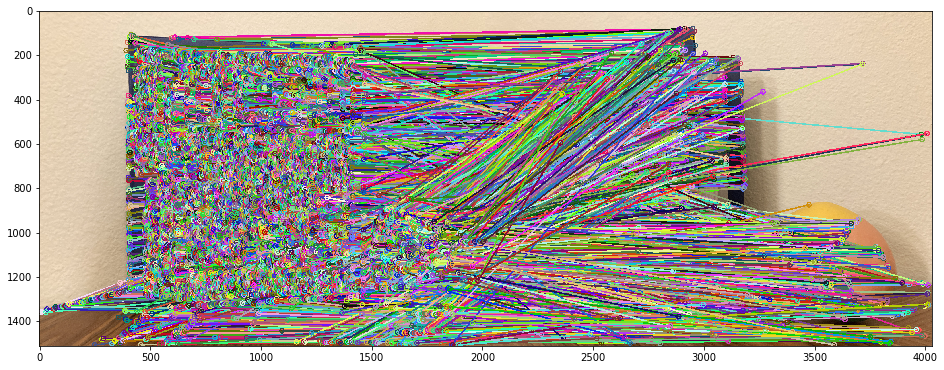

In [19]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results. 

# read images
img1 = imread('p3/skull-book1.jpg')  
img2 = imread('p3/skull-book2.jpg') 

corners1, corners2 = get_matches_sift(cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY),\
                                      cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY))

print('Found {:d} possibly matching features'.format(corners1.shape[0]))
match_image = create_matching_image(img1, img2, corners1, corners2)
plt.figure(figsize=(16,8));plt.imshow(match_image); plt.show()

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 3.3: Calculate the Fundamental Matrix using RANSAC [25 pts]

Now you have `fundamental_matrix` function which calculates the fundamental matrix $F$ and a set of potential matching points using SIFT and BFMatcher. However, as you see from Problem 3.2, unlike the Problem 2, the SIFT-pipeline doesn't guarantee that those points are perfectly matched. Therefore, we will implement the RANdom SAmple Consensus (RANSAC) method from the lecture to search through the potential matching points and remove those false-matches(outliers) to use for calculating the fundamental matrix.

Complete `fundamental_matrix_ransac` to estimate fundamental matrix with RANSAC method. You will implement `compute_consensus_set` as a building block to find a consensus set. You will also complete functions to calculate distance by $L^2$ distance of points to epipolar line(`point2line_l2_dist`)

In [20]:
import random

def to_homog(points):
    """convert points from euclidean to homogeneous
    """
    m, n = points.shape
    homo_points = np.vstack((points, np.ones(n)))
    return homo_points

# convert points from homogeneous to euclidean
def from_homog(points_homog):
    # write your code here
    
    # Change the matrix data type to float
    points_homog = points_homog.astype(float)
    
    # Extract the last row of the array.
    array_of_Ws = points_homog[-1,:]
    
    # Determine the number of rows of the matrix.
    num_rows = points_homog.shape[0]
    
    # Delete the last row of the points_homog matrix.
    euclid_points = np.delete(points_homog, num_rows-1, axis=0)
    
    # Divide the coordinates with its own w.
    for col in range(len(array_of_Ws)):
        for row in range(euclid_points.shape[0]):
            euclid_points[row, col] = euclid_points[row, col] / array_of_Ws[col]
    
    return euclid_points

def point2line_l2_dist(point, line):
    """This function provides L^2 distance of point to (epipolar) line
    Args:
        point: 2D homogeneous point
        line: (a,b,c) for ax+by+c=0
    Returns:
        distance: L^2 distance of point to line
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Calculate Distance, distance = (ax_i + by_i + c)/(sqrt(a^2 + b^2))
    distance = abs(line[0] * point[0] + line[1] * point[1] + line[2]) / np.sqrt(line[0]**2 + line[1]**2)

    return distance

def compute_consensus_set(x1, x2, F, threshold):
    """This function find consensus set of points for current F
    Args:
        x1: homogeneous points from image1(3xN)
        x2: homogeneous points from image2(3xN)
        F: fundamental matrix
        threshold: the maximum distance allowed for a correspondence
    Returns:
        inliers: numpy array that contains indices of the inliers in x1 and x2
    """
    inliers = []
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Determine the number of x1 points
    num_x1 = x1.shape[1]
    
    for idx in range(0, num_x1):
    
        # Determine the epipolar line for image 1, L(q')
        eipolar_line_img1 = np.dot(F, x2[:, idx])
    
        # Determine the epipolar line for image 2, L'(q)
        eipolar_line_img2 = np.dot(F.T, x1[:, idx])
        
        # Reshape homogeneous coordinates from 3,  to 3 x 1
        homo_x1 = x1[:, idx].reshape(x1.shape[0],1) 
        homo_x2 = x2[:, idx].reshape(x2.shape[0],1) 
        
        # Convert to inhomogeneous coordinates.
        inhomo_x1 = from_homog(homo_x1)
        inhomo_x2 = from_homog(homo_x2)
        
        # Calculate the distance between the corner point and the epipolar line in the first image
        dist_q_L_q_prime = point2line_l2_dist(inhomo_x1, eipolar_line_img1)[0]
        
        # Calculate the distance between the corner point and the epipolar line in the second image
        dist_q_prime_L_primte_q = point2line_l2_dist(inhomo_x2, eipolar_line_img1)[0]
        
        # Find the distance between the matching feature points q and q' using point-line distance
        dist_q_q_prime = dist_q_L_q_prime + dist_q_prime_L_primte_q
        
        # Store the inlier index that are below the distance threshold
        if dist_q_q_prime < threshold:
            
            inliers.append(idx)
 
    return np.array(inliers) 
    

def compute_N(p, s, inlier_p):
    if inlier_p>0.99:
        return 0
    return int(np.log(1 - p) / np.log(1 - inlier_p ** s))

In [21]:
def fundamental_matrix_ransac(x1, x2, threshold=100, confidence=0.95, iter_limit=5000):
    """    
    Computes the fundamental matrix with RANSAC
    Use RANSAC to find the best fundamental matrix by randomly sampling interest points.
    Args:
        x1: possibly matching points from image1(2xN)
        x2: possibly matching points from image2(2xN)
        threshold: distance threshold
        confidence: confidence value, 0.95 by default
        iter_limit: maximum iterations to force running stop
        
    Returns:
        best_F: the best Fundamental Matrix (3x3)
        x1_inliers: A numpy array(2xM) representing the true match points(inliers)
                    from the image1 with respect to best_F
        x2_inliers: A numpy array(2xM) representing the true match points(inliers)
                    from the image2 with respect to best_F        
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    # Convert x1 and x2 to homogeneous coordinates
    x1_homo = to_homog(x1)
    x2_homo = to_homog(x2)
    
    # Initialize the best fundamental matrix, best_F (3 x 3)
    best_F = np.zeros((3,3))
    
    # Initialize the most number of inliers
    best_num_Inliers = -1
    
    # Initialize the best set of inliers
    best_set_Inliers = None
    
    # Start the iteration to perform RanSaC to discard outliers
    for iteration in range(0, iter_limit):
        
        # Random 8 indices in list data type (No repetition).
        random_indices = random.sample(range(0,x1_homo.shape[1]), 8)
        
        # Random x1s
        rand_x1_pts = x1_homo[:, random_indices]
        
        # Random x2s
        rand_x2_pts = x2_homo[:, random_indices]
        
        # Determine the Fundamental Matrix, F
        F = fundamental_matrix(rand_x1_pts, rand_x2_pts)
        
        # Get the inliers indices (Array Data Type, N)
        inliers_indices = compute_consensus_set(x1_homo, x2_homo, F, threshold)
        
        # Count the Total Number of Inliers
        num_Inliers = inliers_indices.shape[0]
        
        # If the score is better than the previous iteration
        if (num_Inliers > best_num_Inliers):
            
            #print("Selected Indices: ", inliers_indices)
            
            # Initialize x1 and x2 inliers
            x1_inliers = np.zeros((2, num_Inliers))
            x2_inliers = np.zeros((2, num_Inliers))
            # Store inliers
            for i in range(0, num_Inliers):
                
                x1_inliers[:, i] = x1[:, inliers_indices[i]]
                x2_inliers[:, i] = x2[:, inliers_indices[i]]
                
            # Store the new best number of inliers
            best_num_Inliers = num_Inliers
            
            #print("Total # of inliers: ",best_num_Inliers)
            
            #print("Iteration #: ",iteration)
            
            # Store the best F
            best_F = F
    
    return best_F, x1_inliers, x2_inliers

First, test your implementation on **warrior** with ground truth matches. The two pairs of images 1) the matching pair with F estimated from the whole set set of corners and 2) the matching pair with F estimated with RANSAC method. The two matching pairs should look very similar.

./p2/warrior/warrior0.png
Found 11 possibly matching features

	F estimated with whole set of points				 F estimated with RANSAC


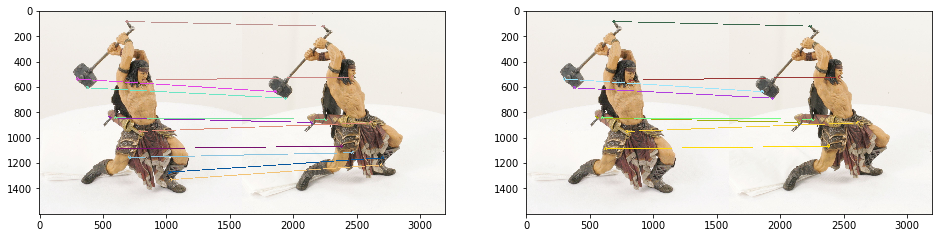

In [22]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results. 

imgids = [ "warrior"]
for imgid in imgids:
    print("./p2/"+imgid+"/"+imgid+"0.png")
    I1 = imread("./p2/"+imgid+"/"+imgid+"0.png")
    I2 = imread("./p2/"+imgid+"/"+imgid+"1.png")
    
    cor1 = np.load("./p2/"+imgid+"/cor1.npy")
    cor2 = np.load("./p2/"+imgid+"/cor2.npy")
    
    print('Found {:d} possibly matching features'.format(cor1.shape[1]))
    
    F_all = fundamental_matrix(cor1, cor2)
    match_image_all = create_matching_image(I1, I2, cor1.T, cor2.T)
    
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1); plt.imshow(match_image_all);
    
    F, x1_in, x2_in = fundamental_matrix_ransac(cor1[:2,:], cor2[:2,:], threshold=100)
    match_image = create_matching_image(I1, I2, x1_in.T, x2_in.T)
    print('\n\tF estimated with whole set of points\t\t\t\t F estimated with RANSAC')
    
    plt.subplot(1,2,2); plt.imshow(match_image); plt.show()   


Then, show your results for **skull-book**. You can tweak the parameters to `fundamental_matrix_ransac` to optimize your results. 

In [23]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results.  

def plot_matching_origin(I1, I2, corners1, corners2):
    F_all = fundamental_matrix(to_homog(corners1.T), to_homog(corners2.T))
    match_image_all = create_matching_image(I1, I2, corners1, corners2)
    print('\n F estimated with whole set of points')
    plt.figure(figsize=(16,8)); plt.imshow(match_image_all)

def plot_matching_RANSAC(I1, I2, corners1, corners2, l2_thresh):
    F_l2, x1_in_l2, x2_in_l2 = fundamental_matrix_ransac(corners1.T, corners2.T, threshold=l2_thresh)
    match_image_l2 = create_matching_image(I1, I2, x1_in_l2.T, x2_in_l2.T)
    print('F estimated with RANSAC, Dist threshold='+str(l2_thresh))
    plt.figure(figsize=(16,8)); plt.imshow(match_image_l2);

In [24]:
# LOAD CODE: DO NOT MODIFY
I1 = imread("./p3/skull-book1.jpg");scale_a=0.5;
I2 = imread("./p3/skull-book2.jpg");scale_b=0.5;

I1 = cv2.resize(I1, \
                (int(I1.shape[1] * scale_a), int(I1.shape[0] * scale_a)),\
                interpolation = cv2.INTER_AREA)
I2 = cv2.resize(I2, \
                (int(I2.shape[1] * scale_b), int(I2.shape[0] * scale_b)),\
                interpolation = cv2.INTER_AREA)

corners1, corners2 = get_matches_sift(cv2.cvtColor(I1, cv2.COLOR_RGB2GRAY),\
                                  cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY))
print('Found {:d} possibly matching features'.format(corners1.shape[0]))

Found 3903 possibly matching features



 F estimated with whole set of points


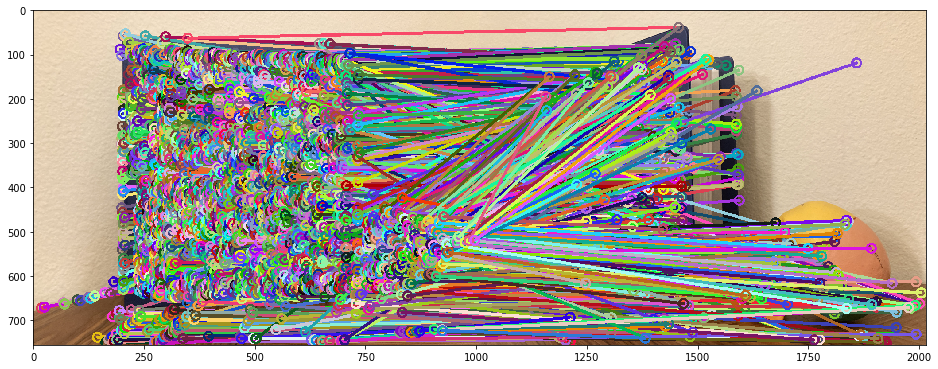

In [25]:
# PLOT CODE: DO NOT MODIFY

plot_matching_origin(I1, I2, corners1, corners2)
plt.show()

F estimated with RANSAC, Dist threshold=80


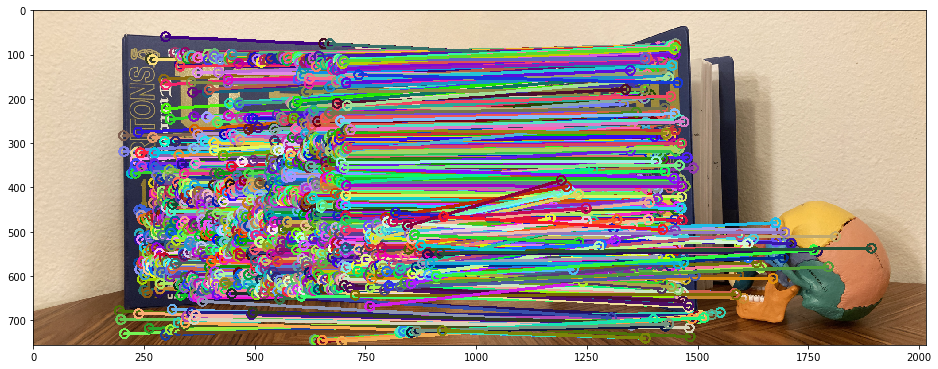

In [26]:
l2_thresh = 80 #You can tweak this

#PLOT CODE: DO NOT MODIFY
plot_matching_RANSAC(I1, I2, corners1, corners2, l2_thresh)
plt.show()

Finally, choose ANY ONE SETTING of RANSAC method to plot epipolar lines using `plot_epipolar_lines` function from Problem 2.3 on **skull-book**.

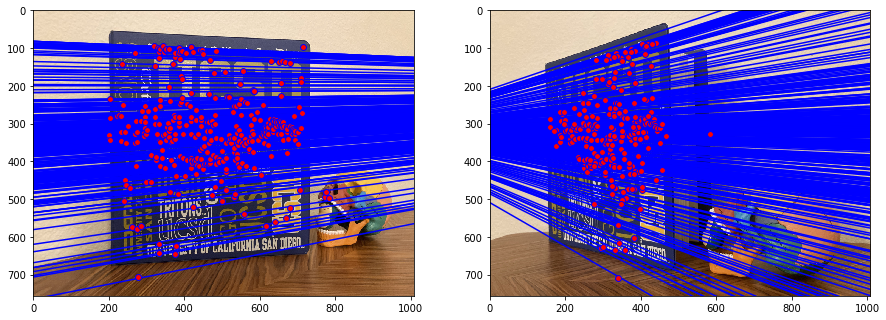

In [27]:
I1 = imread("./p3/skull-book1.jpg");scale_a=0.5;
I2 = imread("./p3/skull-book2.jpg");scale_b=0.5;

I1 = cv2.resize(I1, \
                (int(I1.shape[1] * scale_a), int(I1.shape[0] * scale_a)),\
                interpolation = cv2.INTER_AREA)
I2 = cv2.resize(I2, \
                (int(I2.shape[1] * scale_b), int(I2.shape[0] * scale_b)),\
                interpolation = cv2.INTER_AREA)
""" ==========
YOUR CODE HERE
========== """
# Compute Estimated Fundamental Matrix with RANSAC (Points to Line)
F_RanSaC, x1_cors, x2_cors = fundamental_matrix_ransac(corners1.T, corners2.T, threshold = 30)

# Convert to homogeneous coordinates
x1_cors_homo = to_homog(x1_cors)
x2_cors_homo = to_homog(x2_cors)

# Plot epipolar line
plot_epipolar_lines(I1, I2, F_RanSaC, x1_cors_homo, x2_cors_homo)


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## Problem 4: Optical Flow [15 pts]

In this problem, we will implement the multi-resolution Lucas-Kanade algorithm to estimate optical flow.

An example optical flow output is shown below - this is not a solution, just an example output.

![title](fig/sample_optical_flow_output.png)

### Problem 4.1: Lucas-Kanade implementation [15 pts]

Implement the Lucas-Kanade method for estimating optical ﬂow. Fill in the function `compute_LK`.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def grayscale(img):
    '''
    Converts RGB image to Grayscale
    '''
    gray=np.zeros((img.shape[0],img.shape[1]))
    gray=img[:,:,0]*0.2989+img[:,:,1]*0.5870+img[:,:,2]*0.1140
    return gray

def plot_optical_flow(img,U,V,titleStr):
    '''
    Plots optical flow given U,V and one of the images
    '''
    
    # Change t if required, affects the number of arrows
    # t should be between 1 and min(U.shape[0],U.shape[1])
    t=10 
    
    # Subsample U and V to get visually pleasing output
    U1 = U[::t,::t]
    V1 = V[::t,::t]
    
    # Create meshgrid of subsampled coordinates
    r, c = img.shape[0],img.shape[1]
    cols,rows = np.meshgrid(np.linspace(0,c-1,c), np.linspace(0,r-1,r))
    cols = cols[::t,::t]
    rows = rows[::t,::t]
    
    # Plot optical flow
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.quiver(cols,rows,U1,-V1)
    plt.title(titleStr)
    plt.show()


In [34]:
images=[]
for i in range(1,5):
    # each image after converting to gray scale is of size -> 400x288
    images.append(plt.imread('p4/im'+str(i)+'.png')[:,:288,:])

In [35]:
# computes simple Lucas-Kanade Optical Flow
def compute_LK(img1, img2, window, u_prev=None, v_prev=None):
    """ ==========
    YOUR CODE HERE
    ========== """
    # Get the size of the image
    Height_1, Width_1 = img1.shape
    Height_2, Width_2 = img1.shape
    
    # Obtain the gradients in x and y directions for image 1
    I_x, I_y = np.gradient(img1)
    I_t = img2 - img1
    
    # Determine I_x^2, I_y^2, I_xt, I_yt, and I_xy
    I_x_sq = I_x**2
    I_y_sq = I_y**2
    I_xy = I_x * I_y
    I_xt = I_x * I_t
    I_yt = I_y * I_t
    
    # Initialize Image Point Coordinate
    U = np.zeros((Height_1, Width_1))
    V = np.zeros((Height_1, Width_1))
            
    # Find all the corners in the image
    for h in range(0, Height_1):
        for w in range(0, Width_1):
            
            # Check the offsets before assigning the index
            # Starting index of Height
            if h - window//2 < 0:
                initial_h = 0
            else:
                initial_h = h - window//2
            # Last index of Height
            if h + window//2 > Height_1:
                last_h = Height_1
            else:
                last_h = h + window//2   
            # Starting index of Width
            if w - window//2 < 0:
                initial_w = 0
            else:
                initial_w = w - window//2
            # Last index of Width
            if w + window//2 > Width_1:
                last_w = Width_1
            else:
                last_w = w + window//2   
            
            # Window of I_x_sq
            window_I_x_sq = I_x_sq[initial_h : last_h + 1, initial_w: last_w + 1]
            # Sum of all I_x_sq
            sum_I_x_sq = np.sum(window_I_x_sq)
            
            # Window of I_y_sq
            window_I_y_sq = I_y_sq[initial_h : last_h + 1, initial_w: last_w + 1]
            # Sum of all I_x_sq
            sum_I_y_sq = np.sum(window_I_y_sq)
            
            # Window of I_xy
            window_I_xy = I_xy[initial_h : last_h + 1, initial_w: last_w + 1]
            # Sum of all I_x_sq
            sum_I_xy = np.sum(window_I_xy)
            
            # Construct spatial gradient matrix, M
            M = np.array([[sum_I_x_sq, sum_I_xy],[sum_I_xy, sum_I_y_sq]])
            
            # Window of I_xt
            window_I_xt = I_xt[initial_h : last_h + 1, initial_w: last_w + 1]
            # Sum of all I_xt
            sum_I_xt = np.sum(window_I_xt)
            
            # Window of I_yt
            window_I_yt = I_yt[initial_h : last_h + 1, initial_w: last_w + 1]
            # Sum of all I_yt
            sum_I_yt = np.sum(window_I_yt)
            
            # Construct vector b
            b = np.array([[-sum_I_xt],[-sum_I_yt]])
            
            # Determine the Optical Flow Vector, U
            U_vec = np.dot(np.linalg.inv(M), b)
            
            # Add to the matrix U and V
            U[h, w] = U_vec[0]
            V[h, w] = U_vec[1]
            
    return U, V

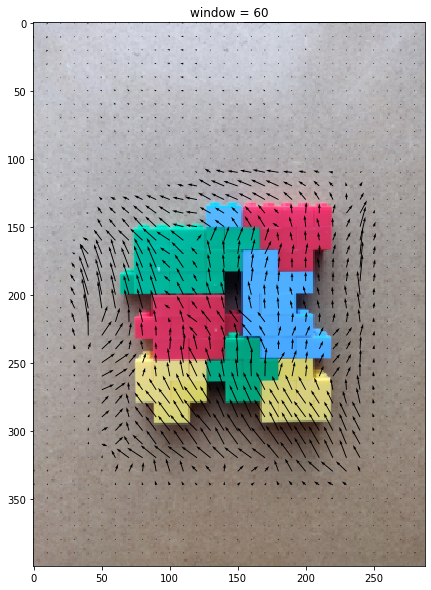

In [36]:
# PLOT CODE: DO NOT MODIFY
## Test your implementation on sample parameter values
window = 60
U, V = compute_LK(grayscale(images[0]),grayscale(images[1]), window)
# Plot
plot_optical_flow(images[0],U,V, 'window = '+str(window))

**Test with different Window size:**

Plot optical ﬂow for the pair of images im1 and im2 for at least 3 diﬀerent window sizes which leads to observable diﬀerence in the results. Comment on the eﬀect of window size on results and justify.

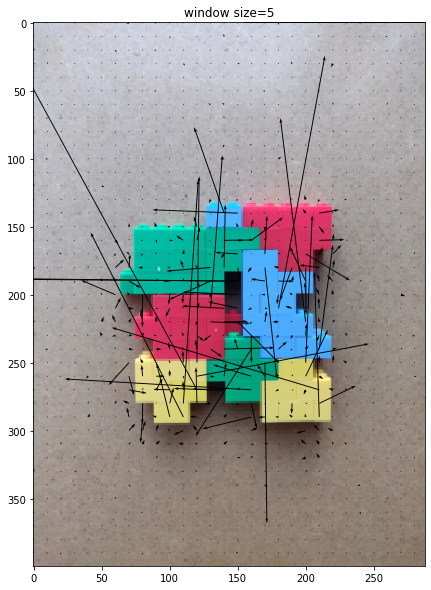

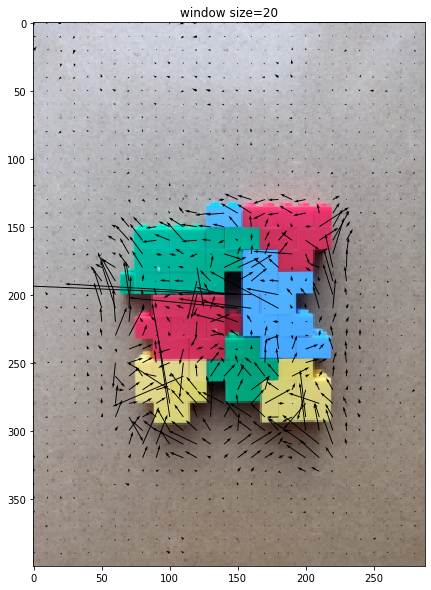

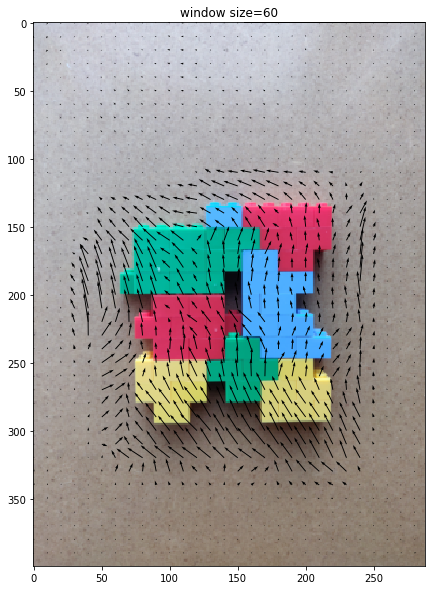

In [37]:
windows=[5,20,60]

for i in range(3):
    U,V=compute_LK(grayscale(images[0]),grayscale(images[1]),windows[i])
    plot_optical_flow(images[0],U,V,'window size='+str(windows[i]))

**Your comments here:**<br>
As the search window size increases, the chances of finding the patch in the current image that is similar to the previous image patch is higher. Hence, the optical flow field results improve as the window size increases based on the generated images above. 

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### Problem 4.2: Multi-resolution Lucas-Kanade implementation[Optional][0 pts]

**NOTE: This problem is optional. Your submission for this problem would be graded but you would not receive a score for solving this problem. However, you are welcome and encouraged to try it out and bring any questions that you have to the instructional team.**


Implement the Lucas-Kanade method for estimating optical flow. The function `LucasKanadeMultiScale` needs to be completed. You can implement `upsample_flow` and `OpticalFlowRefine` as 2 building blocks in order to complete this.

In [ ]:
# you can use interpolate from scipy
# You can implement 'upsample_flow' and 'OpticalFlowRefine' 
# as 2 building blocks in order to complete this.
def upsample_flow(u_prev, v_prev):
    ''' You may implement this method to upsample optical flow from previous level
    Args:
        u_prev, v_prev: optical flow from prev level
    Returns:
        u, v: upsampled optical flow to the current level
    '''
    """ ==========
    YOUR CODE HERE
    ========== """
    
    return u, v

def OpticalFlowRefine(im1,im2,window, u_prev=None, v_prev=None):
    '''
    Inputs: the two images at current level and window size
    u_prev, v_prev - previous levels optical flow
    Return u,v - optical flow at current level
    '''   
    """ ==========
    YOUR CODE HERE
    ========== """
    
    return u, v

In [ ]:
from skimage.transform import resize

def LucasKanadeMultiScale(im1,im2,window, numLevels=2):
    '''
    Implement the multi-resolution Lucas kanade algorithm
    Inputs: the two images, window size and number of levels
    if numLevels = 1, then compute optical flow at only the given image level.
    Returns: u, v - the optical flow
    '''
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    
    return u, v

In [ ]:
numLevels=5
window = 17
U, V = LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                          window,numLevels)
# # Plot
plot_optical_flow(images[0],U,V, \
                  'levels = ' + str(numLevels) + ', window = '+str(window))

#### Problem 4.2.2: Number of levels

Plot optical flow for the pair of images im1 and im2 for different number of levels mentioned below. Comment on the results and justify.<br>
(i) window size = 13, numLevels = 1<br>
(ii) window size = 13, numLevels = 3<br>
(iii) window size = 13, numLevels = 5<br>
So, you are expected to provide 3 outputs here<br>

Note: if numLevels = 1, then it means the optical flow is only computed at the image resolution i.e. no downsampling

In [ ]:
# Example code to generate output
numLevels=1
U,V=LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                          window,numLevels)
plot_optical_flow(images[0],U,V, \
                  'levels = ' + str(numLevels) + ', window = '+str(window))

numLevels=3
U,V=LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                          window,numLevels)
# Plot
plot_optical_flow(images[0],U,V, \
                  'levels = ' + str(numLevels) + ', window = '+str(window))

numLevels=5
U,V=LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                          window,numLevels)
# Plot
plot_optical_flow(images[0],U,V, \
                  'levels = ' + str(numLevels) + ', window = '+str(window))

**Your comments here**

#### Problem 4.2.3: Window size

Plot optical flow for the pair of images im1 and im2 for at least 3 different window sizes which leads to observable difference in the results. Comment on the effect of window size on results and justify. For this part fix the number of levels to be 3.

In [ ]:
# Example code, change as required
numLevels=3

w1, w2, w3 = 7, 11, 17
for window in [w1, w2, w3]:
    U,V=LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                              window,numLevels)
    plot_optical_flow(images[0],U,V, \
                      'levels = ' + str(numLevels) + ', window = '+str(window))

**Your comments here:**

#### Problem 4.2.4 All pairs

Find optical ﬂow for the pairs (im1,im2), (im1,im3), (im1,im4) for a range of window sizes. Submit the best result for each pair. Does the optical ﬂow result seem consistent with visual inspection? Comment on the type of motion indicated by results and visual inspection and explain why they might be consistent or inconsistent.

In [ ]:
# use one fixed window and numLevels for all pairs
numLevels = 5
window = 17
""" ==========
YOUR CODE HERE
========== """

**Your Comments here:**